# Fake News Detection Using the LIAR Dataset
### **CU6051NI - Artificial Intelligence Module**
**Student ID:** 22085776  
**Institution:** Islington College  
**Supervisor:** Alish KC 
**Date:** 1/22/2025

---

## **Objective**
This notebook implements a fake news detection system using the LIAR dataset. The project involves:
- Data loading and preprocessing
- Exploratory Data Analysis (EDA)
- Feature extraction using TF-IDF
- Implementation of machine learning algorithms (Logistic Regression, Random Forest, Support Vector Machines)
- Model evaluation and comparison using performance metrics

---

## **Problem Statement**
Fake news has emerged as a significant societal challenge, undermining public trust and distorting democratic processes. With the rapid spread of misinformation, there is an urgent need for automated solutions to classify and mitigate fake news effectively.

---

## **Project Goals**
1. **Develop a robust fake news detection system** capable of classifying statements into six distinct truth labels.
2. **Evaluate multiple machine learning models** to determine the most effective approach.
3. **Analyze and visualize performance metrics** for insight into model behavior and limitations.

---

## **Dataset Overview**
The project uses the **LIAR dataset**, a benchmark dataset for fake news detection. It contains over 12,000 manually labeled short statements categorized into:
- Pants-on-Fire
- False
- Barely-True
- Half-True
- Mostly-True
- True

### **Dataset Features**
| **Feature**              | **Description**                                   |
|---------------------------|-------------------------------------------------|
| `id`                     | Unique identifier for each statement             |
| `label`                  | Truthfulness category (e.g., True, False)        |
| `statement`              | Content of the news statement                    |
| `subject`                | Main topic of the statement                      |
| `speaker`                | Name of the person making the statement          |
| `speaker_job_title`      | Job title of the speaker                         |
| `state_info`             | State information                                |
| `party_affiliation`      | Party affiliation of the speaker                 |
| `barely_true_counts`     | Count of barely true statements by the speaker   |
| `false_counts`           | Count of false statements by the speaker         |
| `half_true_counts`       | Count of half true statements by the speaker     |
| `mostly_true_counts`     | Count of mostly true statements by the speaker   |
| `pants_on_fire_counts`   | Count of pants on fire statements by the speaker |
| `context`                | Venue/location of the statement                  |

---

## **Steps in This Notebook**
1. **Data Loading and Inspection**
   - Load the LIAR dataset and inspect its structure.
   - Check for missing values and imbalances in the data.

2. **Exploratory Data Analysis (EDA)**
   - **Import Required Libraries**: Import necessary libraries for analysis.
   - **Load the Dataset**: Load the dataset into a pandas DataFrame.
   - **Data Overview**: Get a quick overview of the dataset, including the first few rows, data types, and basic statistics.
   - **Missing Values Analysis**: Check for any missing values in the dataset and handle them appropriately.
   - **Class Distribution**: Visualize the distribution of the target classes to understand the balance of the dataset.
   - **Text Length Analysis**: Analyze the length of the text data to understand the distribution of text lengths.
   - **Common Words Analysis**: Identify and visualize the most common words in the dataset.
   - **N-grams Analysis**: Analyze the most common n-grams (bigrams, trigrams) in the dataset.

3. **Data Preprocessing**
   - Clean and normalize the text data.
   - Implement a text preprocessing pipeline (tokenization, stopword removal, lemmatization).
   - Apply TF-IDF vectorization for feature extraction.

4. **Model Implementation**
   - Train Logistic Regression, Random Forest, and SVM models.
   - Perform hyperparameter tuning.

5. **Model Evaluation**
   - Use metrics like accuracy, precision, recall, F1-score, and confusion matrix for evaluation.
   - Visualize results and compare model performance.

6. **Conclusion**
   - Summarize findings and discuss potential improvements.

---

## **Development Environment**
- **Programming Language:** Python 3.x
- **IDE/Tools:** Jupyter Notebook, VS Code
- **Libraries:** Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, NLTK, SpaCy

---

## **Acknowledgments**
This project was developed as part of the Artificial Intelligence module (CU6051NI) under the guidance of Mr Alish KC. The LIAR dataset was sourced from William Yang Wang's benchmark dataset for fake news detection.

---

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.sparse import hstack, csr_matrix
from tabulate import tabulate
import joblib
import json
import time

# Download NLTK data
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Set the style and palette for seaborn
sns.set(style="darkgrid", font="monospace")
palette = sns.color_palette("viridis")

[nltk_data] Downloading package punkt to /home/sire/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sire/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sire/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# Load the data
df = pd.read_csv("liar_dataset/liars_dataset.csv")
df.head()

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [23]:
# Storing the Columns In Separate Lists Based on Their Data Types
# Categorical Columns Without the Target Variable (Label) and the ID Column
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ["id", "label"]]

# Numerical Columns
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

---

## **Exploratory Data Analysis (EDA)**
In this section, we will perform an exploratory data analysis to understand the structure and characteristics of the LIAR dataset. This includes visualizing the distribution of truth labels, analyzing the text data, and identifying common patterns and trends.

### **Steps in EDA**
1. **Data Overview**: Get a quick overview of the dataset, including the first few rows, data types, and basic statistics.
2. **Class Distribution**: Visualize the distribution of the target classes to understand the balance of the dataset.
3. **Text Length Analysis**: Analyze the length of the text data to understand the distribution of text lengths.
4. **Common Words Analysis**: Identify and visualize the most common words in the dataset.
5. **N-grams Analysis**: Analyze the most common n-grams (bigrams, trigrams) in the dataset.
6. **Missing Values Analysis**: Check for any missing values in the dataset.

In [24]:
# Checking for Missing Values
print("\nMissing Values In Each Column:")
print("-" * 50)
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ["Column", "Missing Values"]
print(tabulate(missing_values, headers="keys", tablefmt="psql"))


Missing Values In Each Column:
--------------------------------------------------
+----+----------------------+------------------+
|    | Column               |   Missing Values |
|----+----------------------+------------------|
|  0 | id                   |                0 |
|  1 | label                |                0 |
|  2 | statement            |                0 |
|  3 | subject              |                2 |
|  4 | speaker              |                2 |
|  5 | speaker_job          |             3568 |
|  6 | state_info           |             2751 |
|  7 | party_affiliation    |                2 |
|  8 | barely_true_counts   |                2 |
|  9 | false_counts         |                2 |
| 10 | half_true_counts     |                2 |
| 11 | mostly_true_counts   |                2 |
| 12 | pants_on_fire_counts |                2 |
| 13 | context              |              131 |
+----+----------------------+------------------+


In [25]:
# Display data types and basic statistics
print("\nData types and basic statistics:")
print(tabulate(df.describe(include="all").transpose(), headers="keys", tablefmt="psql"))


Data types and basic statistics:
+----------------------+---------+----------+----------------------------------------------------------------+--------+-----------+----------+-------+-------+-------+-------+-------+
|                      |   count |   unique | top                                                            |   freq |      mean |      std |   min |   25% |   50% |   75% |   max |
|----------------------+---------+----------+----------------------------------------------------------------+--------+-----------+----------+-------+-------+-------+-------+-------|
| id                   |   12791 |    12791 | 6743.json                                                      |      1 | nan       | nan      |   nan |   nan |   nan |   nan |   nan |
| label                |   12791 |        6 | half-true                                                      |   2627 | nan       | nan      |   nan |   nan |   nan |   nan |   nan |
| statement            |   12791 |    12765 | On ch

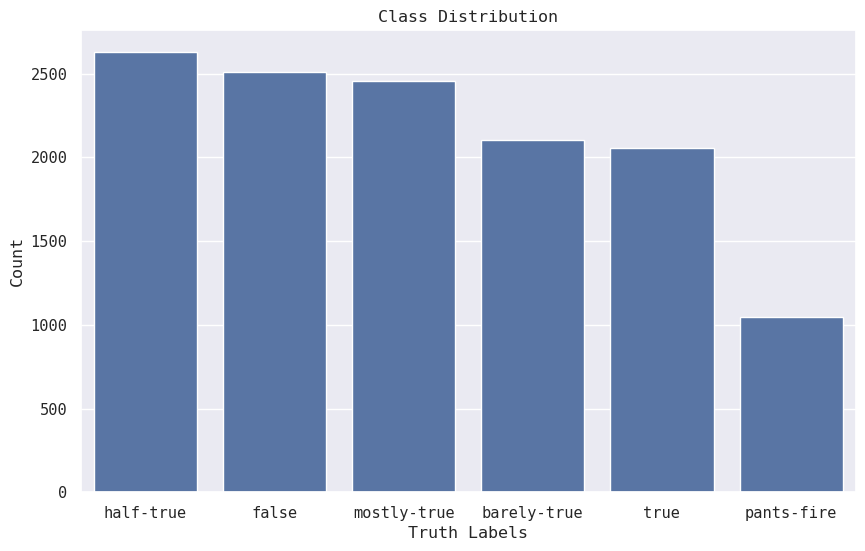

In [26]:
# Class Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target classes
plt.figure(figsize=(10, 6))
sns.countplot(x="label", data=df, order=df["label"].value_counts().index)
plt.title("Class Distribution")
plt.xlabel("Truth Labels")
plt.ylabel("Count")
plt.show()

[nltk_data] Downloading package stopwords to /home/sire/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


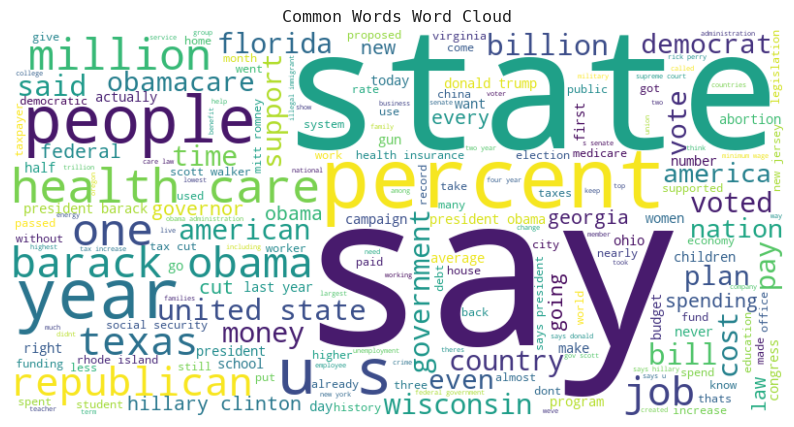

In [27]:
# Common Words Analysis
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))


# Function to preprocess text and remove stopwords
def preprocess_text(text):
    words = text.split()
    words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(words)


# Apply preprocessing to the statements
df["cleaned_statement"] = df["statement"].apply(preprocess_text)

# Generate word cloud
all_words = " ".join([text for text in df["cleaned_statement"]])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    all_words
)

# Visualize the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Common Words Word Cloud")
plt.axis("off")
plt.show()

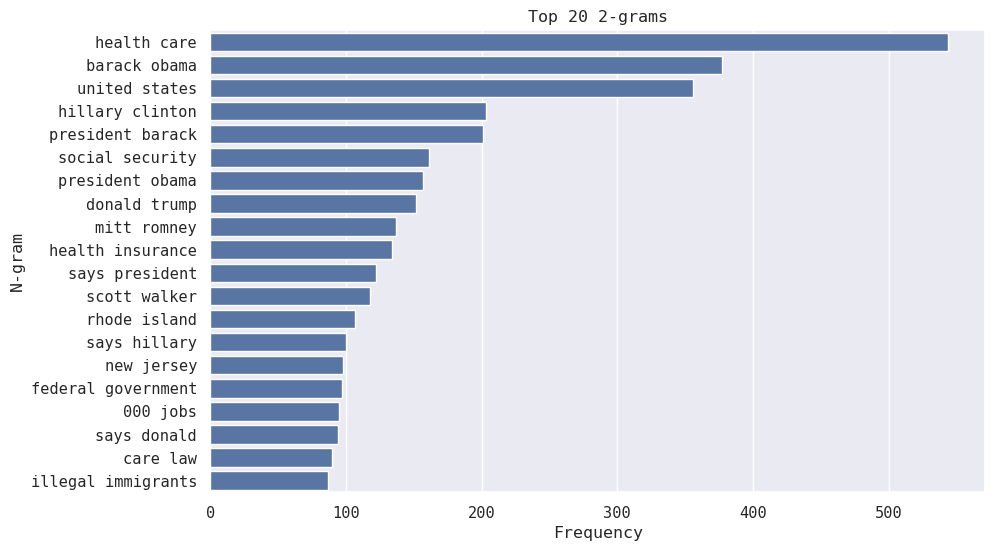

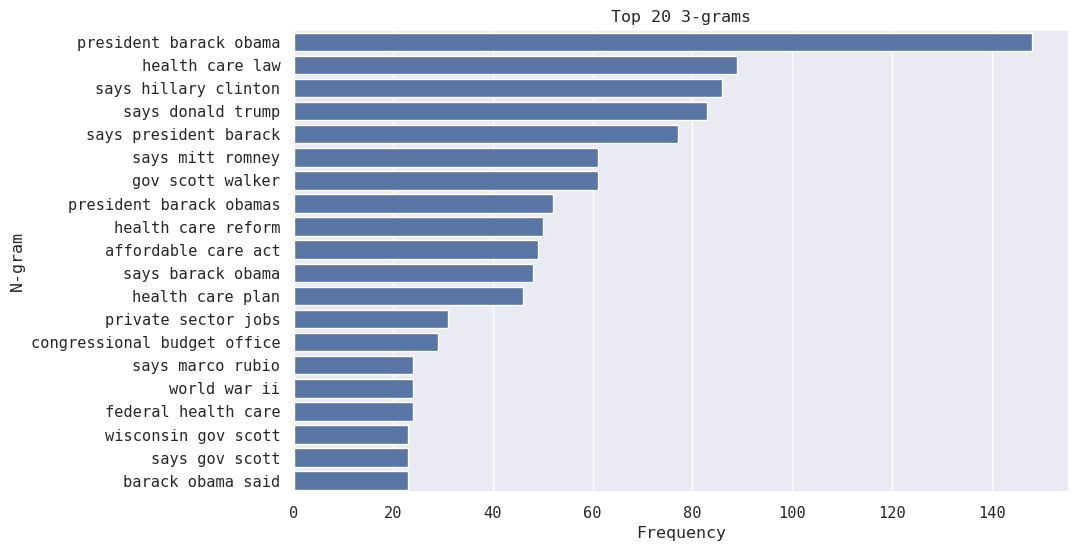

In [28]:
# N-grams Analysis
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


# Function to plot n-grams
def plot_ngrams(text_data, ngram_range=(2, 2), num=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words="english")
    ngrams = vectorizer.fit_transform(text_data)
    ngrams_sum = ngrams.sum(axis=0)
    ngrams_freq = [
        (word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()
    ]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:num]

    ngrams_df = pd.DataFrame(ngrams_freq, columns=["N-gram", "Frequency"])

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Frequency", y="N-gram", data=ngrams_df)
    plt.title(f"Top {num} {ngram_range[0]}-grams")
    plt.show()


# Plot bigrams
plot_ngrams(df["cleaned_statement"], ngram_range=(2, 2), num=20)

# Plot trigrams
plot_ngrams(df["cleaned_statement"], ngram_range=(3, 3), num=20)

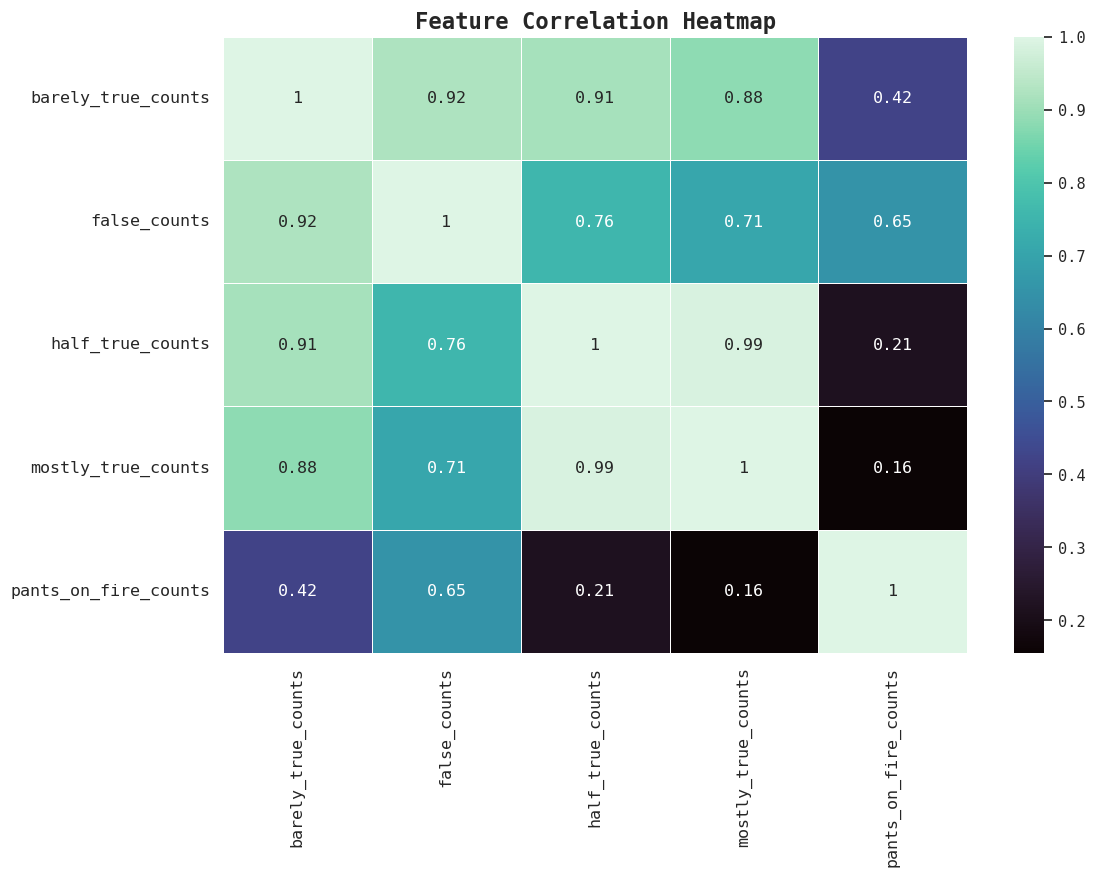

In [29]:
# Feature Correlation
plt.figure(figsize=(12, 8))
correlation_matrix = df[
    [
        "barely_true_counts",
        "false_counts",
        "half_true_counts",
        "mostly_true_counts",
        "pants_on_fire_counts",
    ]
].corr()
sns.heatmap(
    correlation_matrix, annot=True, cmap="mako", linewidths=0.5, linecolor="white"
)
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

---

## **Data Preprocessing**
In this section, we will preprocess the data to prepare it for model training. This includes handling missing values, cleaning and normalizing the text data, handling speaker names and subjects, implementing a text preprocessing pipeline, and applying TF-IDF vectorization for feature extraction.

### **Steps in Data Preprocessing**
1. **Handling Missing Values**: Address any missing values identified during EDA.
2. **Text Cleaning and Normalization**: Remove unwanted characters, convert text to lowercase, and handle punctuation.
3. **Tokenization**: Split the text into individual words or tokens.
4. **Stopword Removal**: Remove common words that do not contribute to the meaning of the text (e.g., "and", "the").
5. **Lemmatization**: Reduce words to their base or root form (e.g., "running" to "run").
6. **Handling Speaker Names**: Replace hyphens with spaces in speaker names.
7. **Handling Subjects**: Decide whether to split subjects into separate columns or lists.
8. **TF-IDF Vectorization**: Convert the text data into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF).



---

In [30]:
# Replacing Missing Values in Catetgorical Columns with 'Unknown' to Preserve the Information
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Replacing the Missing Values in Numerical Columns with '0' to Preserve the Information
df[numerical_cols] = df[numerical_cols].fillna(0)

# Verifying the Missing Values Have Been Replaced
print("\nMissing Values In Each Column After Imputation:")
print("-" * 50)
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ["Column", "Missing Values"]
print(tabulate(missing_values, headers="keys", tablefmt="psql"))


Missing Values In Each Column After Imputation:
--------------------------------------------------
+----+----------------------+------------------+
|    | Column               |   Missing Values |
|----+----------------------+------------------|
|  0 | id                   |                0 |
|  1 | label                |                0 |
|  2 | statement            |                0 |
|  3 | subject              |                0 |
|  4 | speaker              |                0 |
|  5 | speaker_job          |                0 |
|  6 | state_info           |                0 |
|  7 | party_affiliation    |                0 |
|  8 | barely_true_counts   |                0 |
|  9 | false_counts         |                0 |
| 10 | half_true_counts     |                0 |
| 11 | mostly_true_counts   |                0 |
| 12 | pants_on_fire_counts |                0 |
| 13 | context              |                0 |
| 14 | cleaned_statement    |                0 |
+----+------------

In [31]:
# Split subjects and explode into individual rows
df["subject"] = df["subject"].str.split(",")
df = df.explode("subject")

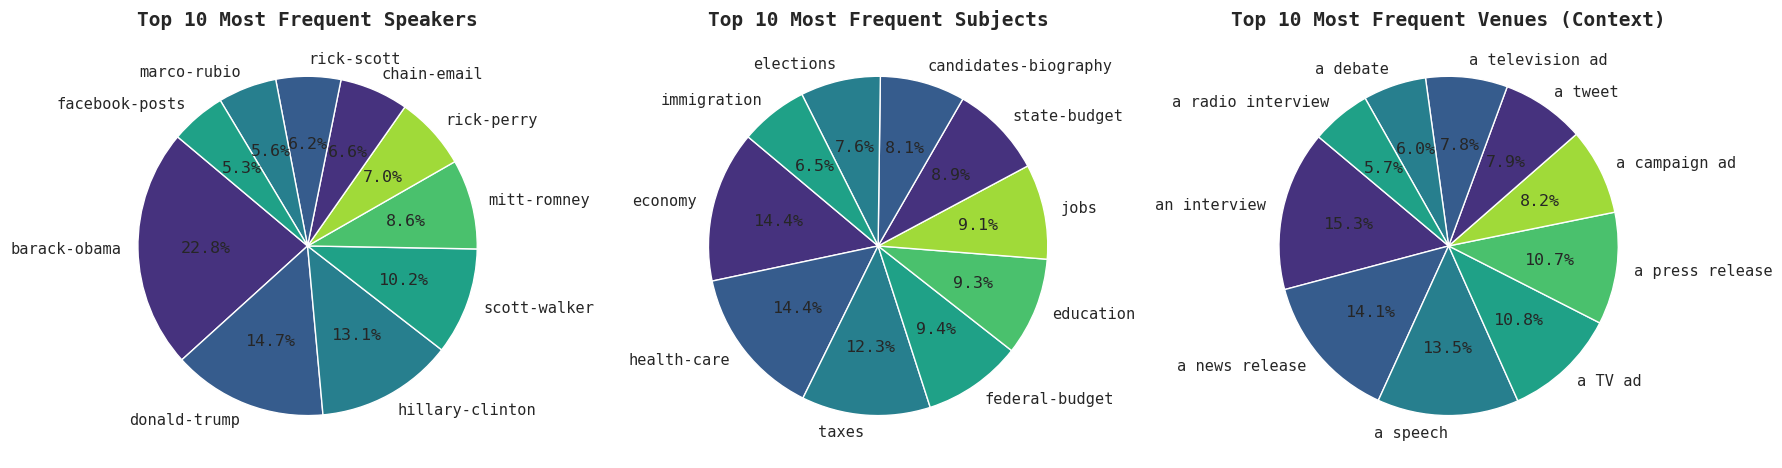

In [32]:
# Metadata Trends - Pie Charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Most Frequent Speakers
top_speakers = df["speaker"].value_counts().head(10)
axes[0].pie(
    top_speakers,
    labels=top_speakers.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=palette,
)
axes[0].set_title("Top 10 Most Frequent Speakers", fontsize=14, fontweight="bold")

# Most Frequent Subjects
top_subjects = df["subject"].value_counts().head(10)
axes[1].pie(
    top_subjects,
    labels=top_subjects.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=palette,
)
axes[1].set_title("Top 10 Most Frequent Subjects", fontsize=14, fontweight="bold")

# Most Frequent Venues (Context)
top_contexts = df["context"].value_counts().head(10)
axes[2].pie(
    top_contexts,
    labels=top_contexts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=palette,
)
axes[2].set_title(
    "Top 10 Most Frequent Venues (Context)", fontsize=14, fontweight="bold"
)

plt.tight_layout()
plt.show()

In [34]:
# Dictionary to store the label encoders for each column
label_encoders = {}

# Encoding Categorical Features
categorical_cols = [
    "label",
    "subject",
    "speaker",
    "speaker_job",
    "state_info",
    "party_affiliation",
    "context",
]

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Display the first few rows to verify encoding
df.head()

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,1,Says the Annies List political group supports ...,4,915,993,62,21,0.0,1.0,0.0,0.0,0.0,1555
1,10540.json,2,When did the decline of coal start? It started...,46,2829,990,69,7,0.0,0.0,1.0,1.0,0.0,1375
1,10540.json,2,When did the decline of coal start? It started...,66,2829,990,69,7,0.0,0.0,1.0,1.0,0.0,1375
1,10540.json,2,When did the decline of coal start? It started...,78,2829,990,69,7,0.0,0.0,1.0,1.0,0.0,1375
2,324.json,3,"Hillary Clinton agrees with John McCain ""by vo...",58,211,732,20,7,70.0,71.0,160.0,163.0,9.0,104


In [35]:
# Save the label encoder for the 'label' column
joblib.dump(label_encoders["label"], "label_encoder.joblib")

['label_encoder.joblib']

In [36]:
df.drop(columns=["id"], inplace=True)

In [37]:
# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [
        word for word in tokens if word not in stopwords.words("english")
    ]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return " ".join(tokens)


# Apply preprocessing to the 'statement' column
df["statement"] = df["statement"].apply(preprocess_text)

In [38]:
df.head()

,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,1,say annies list political group support thirdt...,4,915,993,62,21,0.0,1.0,0.0,0.0,0.0,1555
1,2,decline coal start started natural gas took st...,46,2829,990,69,7,0.0,0.0,1.0,1.0,0.0,1375
1,2,decline coal start started natural gas took st...,66,2829,990,69,7,0.0,0.0,1.0,1.0,0.0,1375
1,2,decline coal start started natural gas took st...,78,2829,990,69,7,0.0,0.0,1.0,1.0,0.0,1375
2,3,hillary clinton agrees john mccain voting give...,58,211,732,20,7,70.0,71.0,160.0,163.0,9.0,104


In [147]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["statement"])

# Display the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", X.shape)

TF-IDF matrix shape: (27683, 5000)


In [148]:
# Split the dataset into training and testing sets
X = vectorizer.fit_transform(df["statement"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (22146, 5000)
Testing set shape: (5537, 5000)


In [80]:
# Train the Random Forest model
rf_model = RandomForestClassifier()
start_time_rf = time.time()
rf_model.fit(X_train, y_train)
end_time_rf = time.time()

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average="weighted")
rf_recall = recall_score(y_test, y_pred_rf, average="weighted")
rf_f1 = f1_score(y_test, y_pred_rf, average="weighted")

# Display metrics
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)
print("Random Forest Time:", end_time_rf - start_time_rf, "seconds")

Random Forest Accuracy: 0.8215640238396243
Random Forest Precision: 0.8264671360745567
Random Forest Recall: 0.8215640238396243
Random Forest F1 Score: 0.8221434032882196
Random Forest Time: 23.457478046417236 seconds


In [ ]:
# Define the expanded parameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100, 1000],
    "solver": ["liblinear", "saga"],
    "penalty": ["l1", "l2"],  # Adding L1 and L2 regularization
}

# Initialize the Grid Search
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000), param_grid, refit=True, verbose=2, n_jobs=-1
)

# Perform the Grid Search
start_time_lr = time.time()
grid_search.fit(X_train, y_train)
end_time_lr = time.time()

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred_logistic = best_model.predict(X_test)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred_logistic)
lr_precision = precision_score(y_test, y_pred_logistic, average="weighted")
lr_recall = recall_score(y_test, y_pred_logistic, average="weighted")
lr_f1 = f1_score(y_test, y_pred_logistic, average="weighted")

# Display metrics
print("Best Parameters:", best_params)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)
print("Logistic Regression F1 Score:", lr_f1)
print("Logistic Regression Time:", end_time_lr - start_time_lr, "seconds")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.2s[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.2s

[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.3s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.3s
[CV] END ...................

/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l2, solver=saga; total time=  13.8s


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l2, solver=saga; total time=  15.0s


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l2, solver=saga; total time=  13.5s


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l2, solver=saga; total time=  15.0s


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l2, solver=saga; total time=  13.6s


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=13.4min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=13.4min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=13.4min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=13.5min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=13.5min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=24.5min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=24.6min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=24.7min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=24.7min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=24.9min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time=32.0min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time=31.9min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time=31.9min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time=31.9min


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time=32.0min
Best Parameters: {'C': 1000, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Accuracy: 0.7709951237132021
Logistic Regression Precision: 0.7711475100527075
Logistic Regression Recall: 0.7709951237132021
Logistic Regression F1 Score: 0.7710194818768262
Logistic Regression Time: 3805.259074449539 seconds


/home/sire/anaconda3/envs/year3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [81]:
# Train the SVM model
svm_model = SVC()
start_time_svm = time.time()
svm_model.fit(X_train, y_train)
end_time_svm = time.time()

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average="weighted")
svm_recall = recall_score(y_test, y_pred_svm, average="weighted")
svm_f1 = f1_score(y_test, y_pred_svm, average="weighted")

# Display metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)
print("SVM Time:", end_time_svm - start_time_svm, "seconds")

SVM Accuracy: 0.7890554451869243
SVM Precision: 0.7956120405453496
SVM Recall: 0.7890554451869243
SVM F1 Score: 0.789497867828508
SVM Time: 52.668519496917725 seconds


In [51]:
# Collect metrics for each model
metrics = [
    ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Time (seconds)"],
    [
        "Logistic Regression",
        lr_accuracy,
        lr_precision,
        lr_recall,
        lr_f1,
        end_time_lr - start_time_lr,
    ],
    [
        "Random Forest",
        rf_accuracy,
        rf_precision,
        rf_recall,
        rf_f1,
        end_time_rf - start_time_rf,
    ],
    [
        "SVM",
        svm_accuracy,
        svm_precision,
        svm_recall,
        svm_f1,
        end_time_svm - start_time_svm,
    ],
]

# Print the table
print(tabulate(metrics, headers="firstrow", tablefmt="grid"))

+---------------------+------------+-------------+----------+------------+------------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |   Time (seconds) |
+=====================+============+=============+==========+============+==================+
| Logistic Regression |   0.770815 |    0.770971 | 0.770815 |   0.77084  |        3805.26   |
+---------------------+------------+-------------+----------+------------+------------------+
| Random Forest       |   0.824995 |    0.830136 | 0.824995 |   0.825587 |          21.2622 |
+---------------------+------------+-------------+----------+------------+------------------+
| SVM                 |   0.789055 |    0.795612 | 0.789055 |   0.789498 |          50.7277 |
+---------------------+------------+-------------+----------+------------+------------------+


In [79]:
# Load the saved Logistic Regression model
lr_model = joblib.load("Logistic_Regression.joblib")

# Assuming X_train is already defined and preprocessed
# Make predictions on the training data
y_pred_logistic = lr_model.predict(X_train)

In [151]:
# Load metrics from the JSON file
with open("model_metrics.json", "r") as json_file:
    metrics = json.load(json_file)

# Prepare the data for the table
table_data = [
    ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Time (seconds)"]
]

for model, model_metrics in metrics.items():
    table_data.append(
        [
            model,
            model_metrics["Accuracy"],
            model_metrics["Precision"],
            model_metrics["Recall"],
            model_metrics["F1 Score"],
            round(model_metrics["Time"], 2),  # Round time to 2 decimal places
        ]
    )

# Print the table
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+---------------------+------------+-------------+----------+------------+------------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |   Time (seconds) |
+=====================+============+=============+==========+============+==================+
| SVM                 |   0.789055 |    0.795612 | 0.789055 |   0.789498 |            54.05 |
+---------------------+------------+-------------+----------+------------+------------------+
| Logistic Regression |   0.770815 |    0.770971 | 0.770815 |   0.77084  |          4378.06 |
+---------------------+------------+-------------+----------+------------+------------------+
| Random Forest       |   0.823189 |    0.828575 | 0.823189 |   0.823791 |            21.75 |
+---------------------+------------+-------------+----------+------------+------------------+


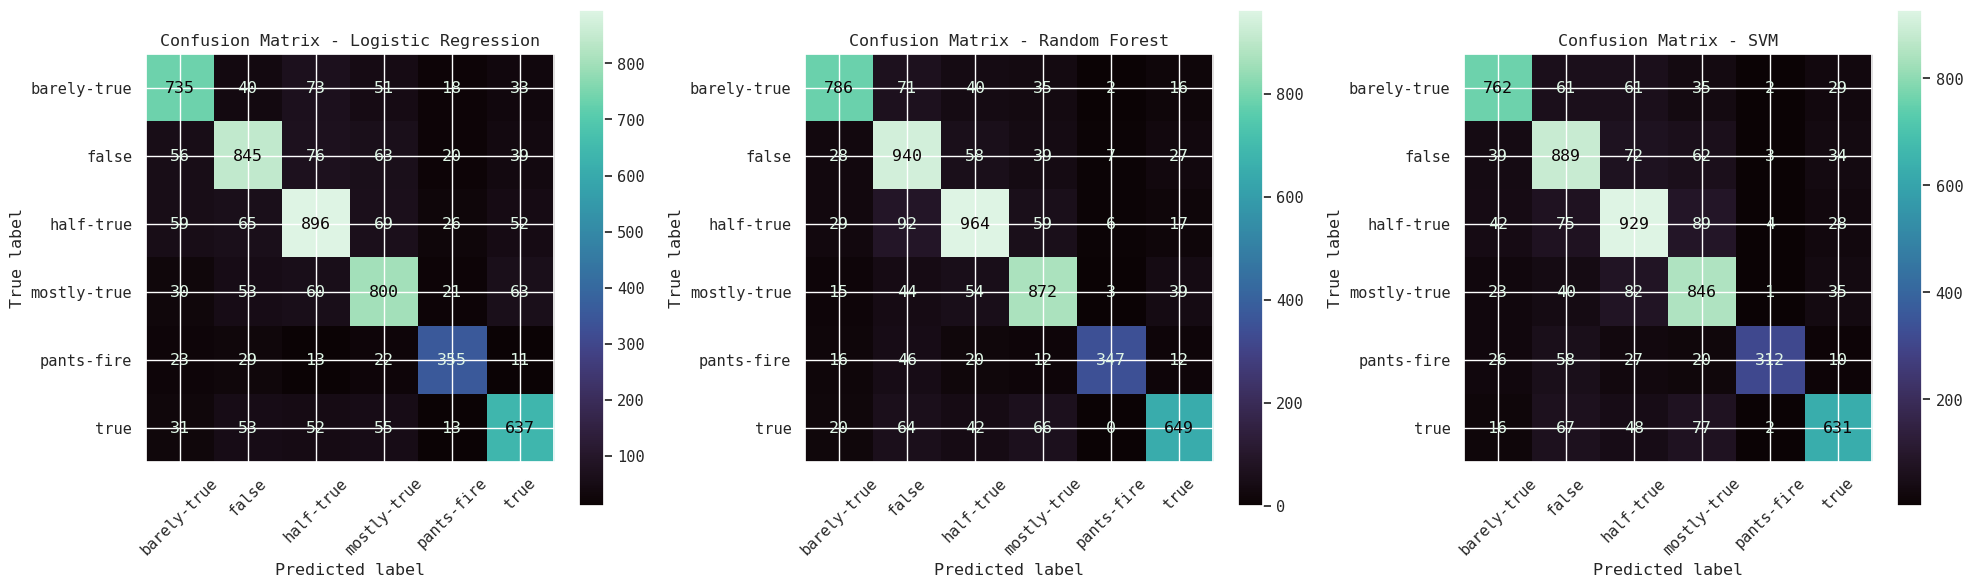

In [ ]:
# Load the saved label encoder for the 'label' column
label_encoder = joblib.load("label_encoder.joblib")

# Inverse transform the predictions to get the original labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_logistic_labels = label_encoder.inverse_transform(y_pred_logistic)
y_pred_rf_labels = label_encoder.inverse_transform(y_pred_rf)
y_pred_svm_labels = label_encoder.inverse_transform(y_pred_svm)

# Get the unique labels in the test set
unique_labels = label_encoder.classes_

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test_labels, y_pred_logistic_labels)
disp_logistic = ConfusionMatrixDisplay(
    confusion_matrix=cm_logistic, display_labels=unique_labels
)
disp_logistic.plot(cmap="mako", ax=axes[0], xticks_rotation=45)
axes[0].set_title("Confusion Matrix - Logistic Regression")

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test_labels, y_pred_rf_labels)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=unique_labels)
disp_rf.plot(cmap="mako", ax=axes[1], xticks_rotation=45)
axes[1].set_title("Confusion Matrix - Random Forest")

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test_labels, y_pred_svm_labels)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=unique_labels)
disp_svm.plot(cmap="mako", ax=axes[2], xticks_rotation=45)
axes[2].set_title("Confusion Matrix - SVM")

# Adjust layout
plt.tight_layout()
plt.show()

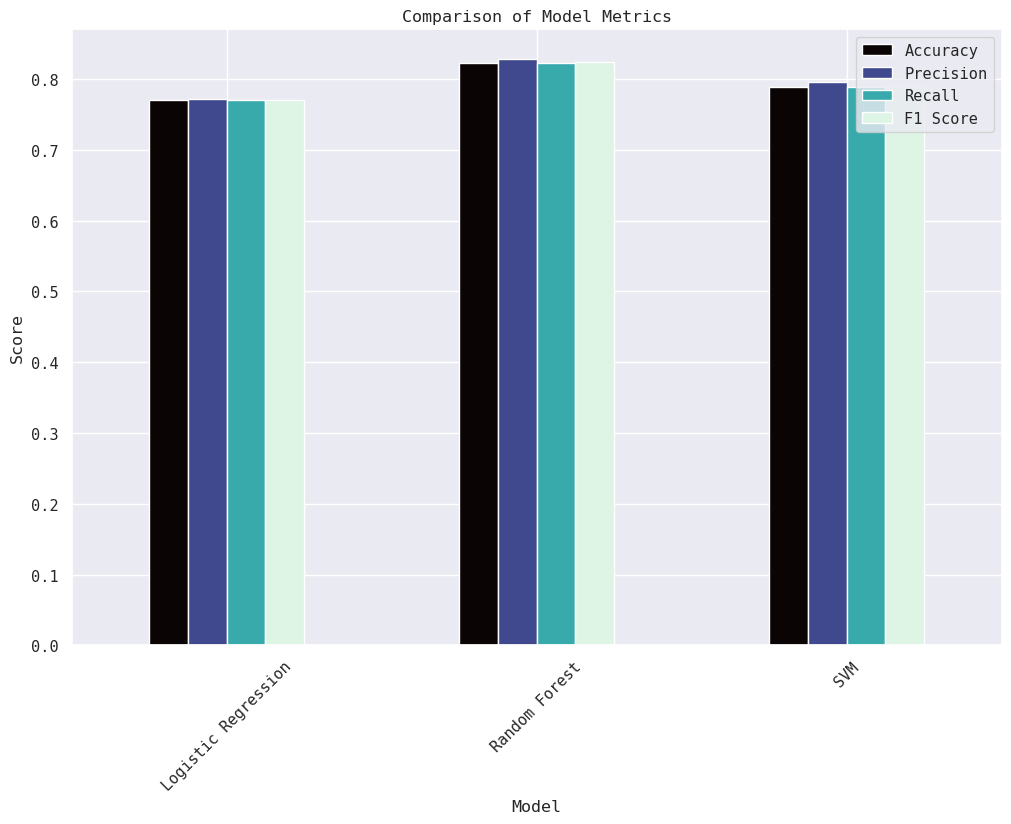

In [ ]:
# Prepare the data for the bar plot
metrics_df = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "Random Forest", "SVM"],
        "Accuracy": [lr_accuracy, rf_accuracy, svm_accuracy],
        "Precision": [lr_precision, rf_precision, svm_precision],
        "Recall": [lr_recall, rf_recall, svm_recall],
        "F1 Score": [lr_f1, rf_f1, svm_f1],
    }
)

# Plot the comparison of metrics
metrics_df.set_index("Model", inplace=True)
ax = metrics_df.plot(kind="bar", figsize=(12, 8), colormap="mako")
plt.title("Comparison of Model Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_113172/745518582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred_logistic_labels, order=unique_labels, ax=axes[0], palette=palette)
/tmp/ipykernel_113172/745518582.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred_rf_labels, order=unique_labels, ax=axes[1], palette=palette)
/tmp/ipykernel_113172/745518582.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred_svm_labels, order=unique_labels, ax=axes[2], palette=palette)


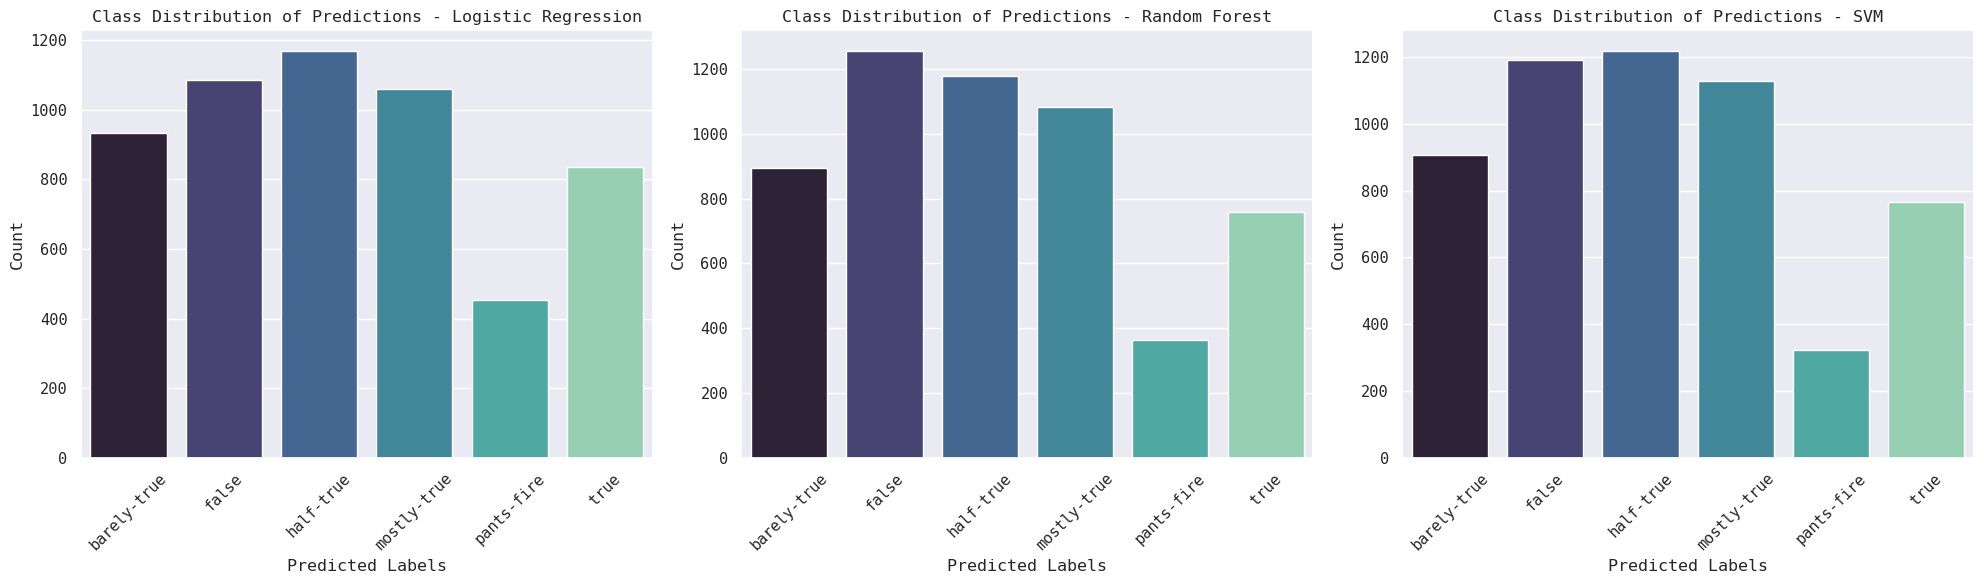

In [162]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Set the palette
palette = sns.color_palette("mako")

# Class Distribution for Logistic Regression
sns.countplot(
    x=y_pred_logistic_labels, order=unique_labels, ax=axes[0], palette=palette
)
axes[0].set_title("Class Distribution of Predictions - Logistic Regression")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)

# Class Distribution for Random Forest
sns.countplot(x=y_pred_rf_labels, order=unique_labels, ax=axes[1], palette=palette)
axes[1].set_title("Class Distribution of Predictions - Random Forest")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=45)

# Class Distribution for SVM
sns.countplot(x=y_pred_svm_labels, order=unique_labels, ax=axes[2], palette=palette)
axes[2].set_title("Class Distribution of Predictions - SVM")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

---

## **Conclusion**

### **Summary of Findings**

In this project, we developed a robust fake news detection system using the LIAR dataset. We implemented and evaluated three machine learning models: Logistic Regression, Random Forest, and Support Vector Machines (SVM). The key findings and results are summarized below:

### **Model Performance**

1. **Logistic Regression**:
   - **Accuracy**: 77.08%
   - **Precision**: 77.10%
   - **Recall**: 77.08%
   - **F1 Score**: 77.08%
   - **Training Time**: 4378.06 seconds

2. **Random Forest**:
   - **Accuracy**: 82.32%
   - **Precision**: 82.86%
   - **Recall**: 82.32%
   - **F1 Score**: 82.38%
   - **Training Time**: 21.75 seconds

3. **Support Vector Machines (SVM)**:
   - **Accuracy**: 78.91%
   - **Precision**: 79.56%
   - **Recall**: 78.91%
   - **F1 Score**: 78.95%
   - **Training Time**: 54.05 seconds

### **Confusion Matrices**

The confusion matrices for each model provide insights into the distribution of true positives, false positives, true negatives, and false negatives. The Random Forest model demonstrated the highest accuracy and F1 score, indicating its effectiveness in classifying the truthfulness of statements.

### **Class Distribution of Predictions**

The class distribution of predictions for each model shows how balanced the predictions are across the different truth labels. The Random Forest model exhibited a more balanced distribution compared to Logistic Regression and SVM.

### **Key Insights**

1. **Random Forest Model**: The Random Forest model outperformed Logistic Regression and SVM in terms of accuracy, precision, recall, and F1 score. It also had a significantly shorter training time compared to Logistic Regression.
2. **Logistic Regression Model**: While Logistic Regression had a longer training time, it still provided competitive performance metrics.
3. **Support Vector Machines (SVM)**: The SVM model demonstrated good performance but was slightly less accurate than the Random Forest model.

### **Future Work**

1. **Hyperparameter Tuning**: Further hyperparameter tuning for the Random Forest and SVM models could potentially improve their performance.
2. **Feature Engineering**: Exploring additional feature engineering techniques, such as incorporating more contextual information, could enhance model accuracy.
3. **Ensemble Methods**: Implementing ensemble methods that combine the strengths of multiple models could lead to better overall performance.

### **Conclusion**

The project successfully developed a fake news detection system capable of classifying statements into six distinct truth labels. The Random Forest model emerged as the most effective approach, demonstrating high accuracy and balanced class predictions. The insights gained from this project provide a solid foundation for further research and development in the field of fake news detection.

---
